<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/ARIMA_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
stock_data = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/tcs-stock.csv", index_col='Date',parse_dates=True)

In [4]:
stock_data.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [7]:
adf_test(stock_data['Close Price'])

ADF Statistics: -2.5563860749202956
p- value: 0.10235050633534265
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [8]:
stock_data['Close Price_1']=stock_data['Close Price']-stock_data['Close Price'].shift(1)
stock_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Close Price_1
Date,,,,,,,,,,,,,,,
2018-05-31,TCS,EQ,3514.10,1734.0,1759.05,1726.10,1748.85,1741.05,1742.44,5049371,8.798250e+09,207998,3447026,68.27,NaN
2018-06-01,TCS,EQ,1741.05,1754.0,1757.50,1716.30,1732.00,1732.45,1742.29,1603856,2.794386e+09,74272,924751,57.66,-8.60
2018-06-04,TCS,EQ,1732.45,1745.0,1749.00,1712.60,1742.00,1744.25,1730.25,1681483,2.909394e+09,96686,928452,55.22,11.80
2018-06-05,TCS,EQ,1744.25,1744.0,1751.90,1711.15,1723.00,1721.60,1728.88,2449568,4.235001e+09,133067,1492228,60.92,-22.65
2018-06-06,TCS,EQ,1721.60,1723.0,1734.90,1715.20,1725.00,1725.75,1725.85,2236512,3.859875e+09,73770,1573892,70.37,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24,TCS,EQ,2054.05,2070.0,2070.00,2032.25,2050.00,2048.00,2051.14,2274208,4.664726e+09,114179,1255954,55.23,-6.05
2019-05-27,TCS,EQ,2048.00,2054.8,2068.95,2040.10,2058.00,2055.15,2054.87,2329820,4.787473e+09,85924,1377094,59.11,7.15
2019-05-28,TCS,EQ,2055.15,2060.0,2097.50,2045.00,2068.00,2073.75,2076.46,5872979,1.219498e+10,205972,4034671,68.70,18.60


In [9]:
adf_test(stock_data['Close Price_1'].dropna())

ADF Statistics: -15.308001620392863
p- value: 4.224048190567688e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

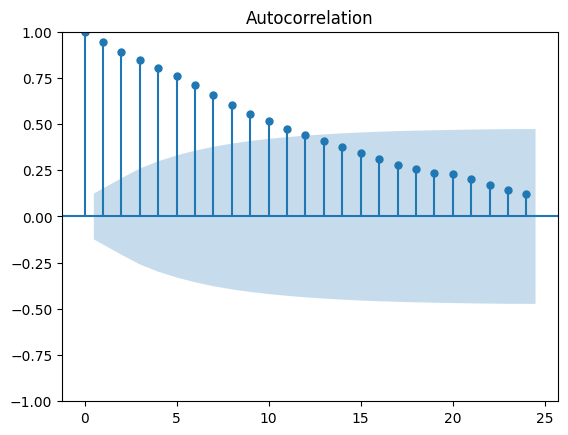

In [11]:
acf_1=plot_acf(stock_data['Close Price'].dropna())

In [12]:
#stock_data['CP4']=stock_data['Close Price']-stock_data['Close Price'].shift(4)

In [13]:
#stock_data['CP5']=stock_data['Close Price']-stock_data['Close Price'].shift(5)

In [14]:
#acf4=plot_acf(stock_data['CP4'].dropna())

In [15]:
#acf5=plot_acf(stock_data['CP5'].dropna())

In [16]:
#stock_data['CP7']=stock_data['Close Price']-stock_data['Close Price'].shift(7)

In [17]:
#acf=plot_acf(stock_data['CP7'].dropna())

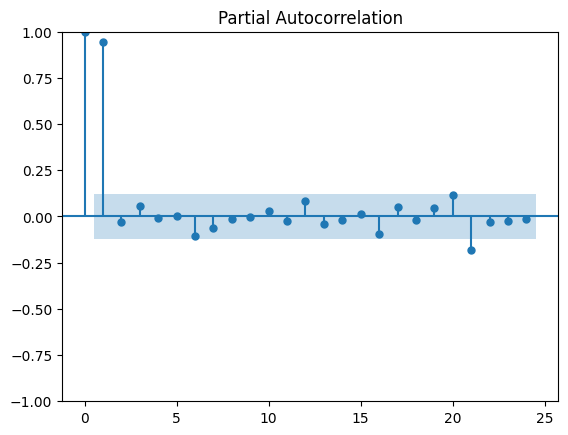

In [18]:
res=plot_pacf(stock_data['Close Price'].dropna())

In [19]:
train_data=stock_data[['Close Price']].copy()

In [20]:
train_data

,Close Price
Date,
2018-05-31,1741.05
2018-06-01,1732.45
2018-06-04,1744.25
2018-06-05,1721.60
2018-06-06,1725.75
...,...
2019-05-24,2048.00
2019-05-27,2055.15
2019-05-28,2073.75


In [21]:
test_data=train_data[200:]
train_data=train_data[:200]

In [22]:
test_data.head()

,Close Price
Date,
2019-03-18,2022.80
2019-03-19,2022.80
2019-03-20,2015.05
2019-03-22,2015.05
2019-03-22,2005.65


In [23]:
test_data.tail()

,Close Price
Date,
2019-05-24,2048.00
2019-05-27,2055.15
2019-05-28,2073.75
2019-05-29,2107.55
2019-05-30,2146.30


In [24]:
train_data.tail()

,Close Price
Date,
2019-03-11,2014.80
2019-03-12,2012.45
2019-03-13,2000.50
2019-03-14,1987.40
2019-03-15,2039.95


In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
model_ARIMA=ARIMA(train_data['Close Price'],order=(18,1,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
model_fit=model_ARIMA.fit()

In [28]:
model_fit=model_ARIMA.fit()

In [53]:
ind=test_data.index
ind.shape

(50,)

In [54]:
pred=model_fit.predict()

In [55]:
pred=pred[1:]

In [56]:
import matplotlib.pyplot as plt

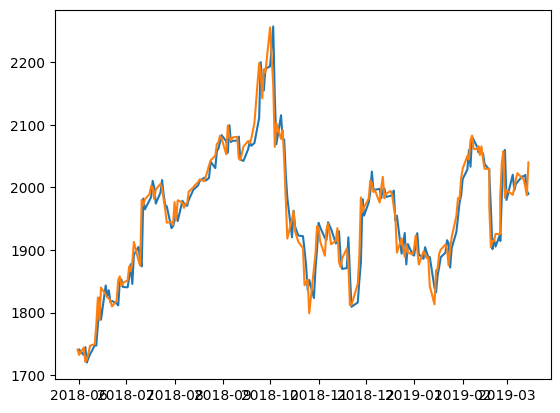

In [57]:
plt.plot(pred)
plt.plot(train_data)
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [86]:
mse=mean_squared_error(train_data[:-1],pred)

In [88]:
print("mse= ",mse)
print("rmse= ",sqrt(mse))

mse= 69.04428950355883
rmse= 8.30928935009239


In [59]:
pred.shape

(199,)

In [60]:
train_data.shape

(200, 1)

In [61]:
pred.index[-1]

Timestamp('2019-03-15 00:00:00')

In [62]:
train_data.index[-1]

Timestamp('2019-03-15 00:00:00')

In [63]:
forecast_values = model_fit.forecast(steps=50)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [64]:
forecast_values

200    2034.975598
201    2029.815198
202    2028.456812
203    2027.324383
204    2019.501320
205    2032.111072
206    2024.636205
207    2024.274368
208    2026.445297
209    2025.321375
210    2021.093224
211    2023.450816
212    2021.228251
213    2016.950056
214    2026.074861
215    2018.703678
216    2018.228132
217    2019.345792
218    2019.063131
219    2018.343893
220    2021.617697
221    2018.564141
222    2019.495943
223    2020.746585
224    2020.503144
225    2019.929577
226    2021.445773
227    2020.856373
228    2020.303574
229    2022.758600
230    2020.482107
231    2021.294956
232    2021.730022
233    2021.294268
234    2021.219848
235    2021.847098
236    2020.796373
237    2021.224588
238    2021.353378
239    2021.026684
240    2020.843086
241    2021.206581
242    2020.813937
243    2020.730484
244    2021.270437
245    2020.517916
246    2020.923660
247    2020.955458
248    2020.770516
249    2020.863037
Name: predicted_mean, dtype: float64

In [65]:
#tst=

In [66]:
testData=stock_data[['Close Price']].copy()
tst=testData[200:]

In [67]:
#pred=tst.copy()

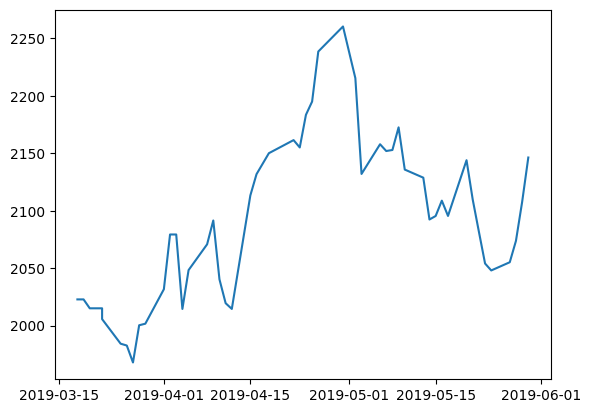

In [68]:
plt.plot(tst)

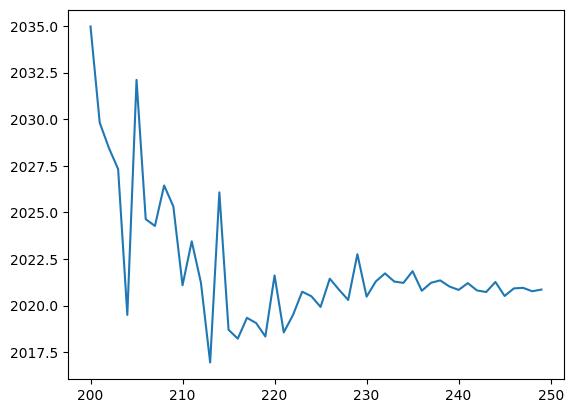

In [69]:
plt.plot(forecast_values)

<Axes: ylabel='Density'>

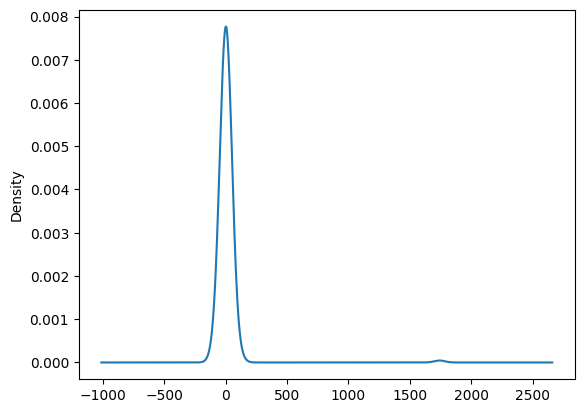

In [70]:
model_fit.resid.plot(kind='kde')


In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
model_SARIMA=SARIMAX(train_data['Close Price'],seasonal_order=(7,1,0,30))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
#model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


KeyboardInterrupt: ignored

In [74]:
#model_SARIMA_fit.summary()

In [75]:
#fc_sar=model_SARIMA_fit.forecast(steps=50)

In [76]:
#fc_sar

In [77]:
#plt.plot(model_SARIMA_fit.predict())